In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Dataset  (1).csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **EDA**

In [ ]:
print("Column Names and Data Types:")
print(df.dtypes)


Column Names and Data Types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [ ]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
# Check for missing values in each column
missing_values_count = df.isnull().sum()
print(missing_values_count)


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


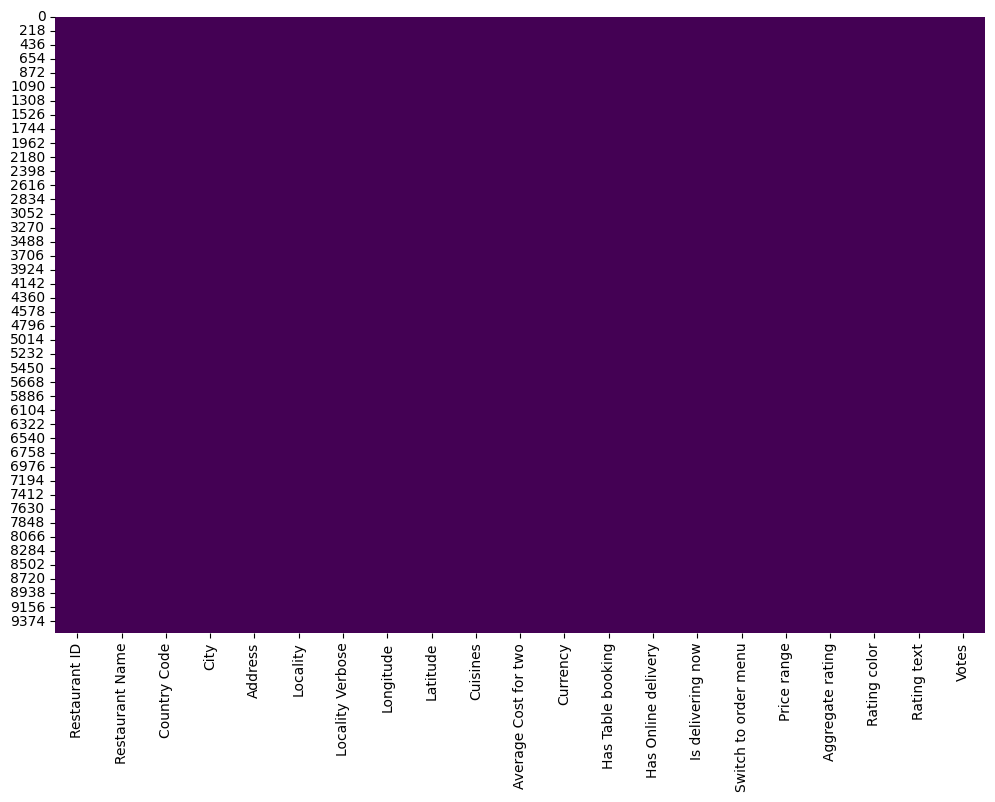

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [ ]:
# Drop rows with any missing values
df_dropped_rows = df.dropna()

# Drop columns with any missing values
df_dropped_cols = df.dropna(axis=1)


In [ ]:
# Drop rows with more than 50% missing values
df_dropped_thresh_rows = df.dropna(thresh=len(df.columns) * 0.5)

# Drop columns with more than 50% missing values
df_dropped_thresh_cols = df.dropna(axis=1, thresh=len(df) * 0.5)


In [ ]:
# Fill missing values in the 'Cuisines' column with 'Unknown'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')


In [ ]:
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


# **Top Cuisines**

In [ ]:
df['Cuisines'] = df['Cuisines'].str.split(', ')
cuisines_expanded = df.explode('Cuisines')

In [ ]:
top_cuisines = cuisines_expanded['Cuisines'].value_counts().head(3)
total_restaurants = df.shape[0]
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100

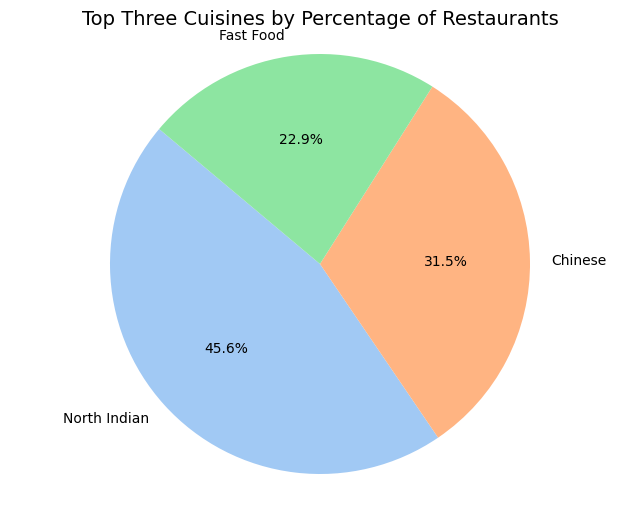

In [ ]:
labels = top_cuisines.index
sizes = top_cuisines_percentage
colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Top Three Cuisines by Percentage of Restaurants', fontsize=14)
plt.axis('equal')
plt.show()


<ipython-input-12-f7a88ba22c79>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sizes, y=labels, palette='viridis')


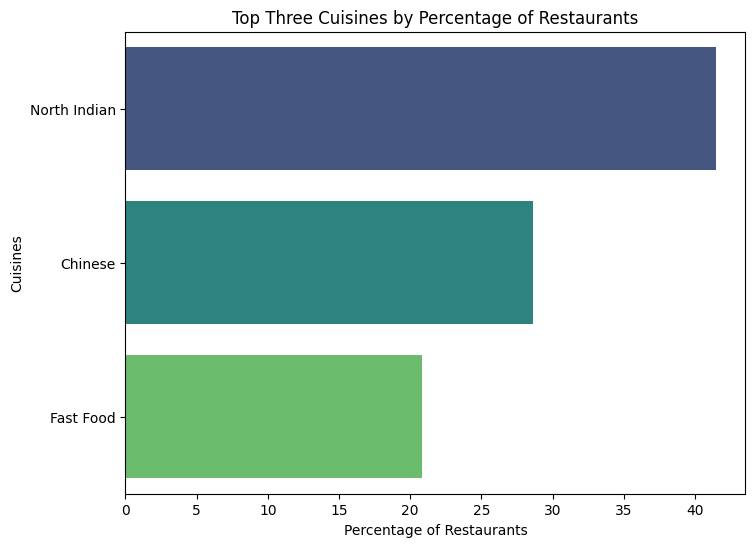

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sizes, y=labels, palette='viridis')
plt.xlabel('Percentage of Restaurants')
plt.ylabel('Cuisines')
plt.title('Top Three Cuisines by Percentage of Restaurants')
plt.show()

# **City Analysis**

In [ ]:
city_counts = df['City'].value_counts()
city_with_most_restaurants = city_counts.idxmax()
city_with_most_restaurants_count = city_counts.max()
print(f"City with the highest number of restaurants: {city_with_most_restaurants} ({city_with_most_restaurants_count} restaurants)")

City with the highest number of restaurants: New Delhi (5473 restaurants)


In [ ]:
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average rating for restaurants in each city:")
print(average_rating_by_city.head())

Average rating for restaurants in each city:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Name: Aggregate rating, dtype: float64


In [ ]:
city_with_highest_avg_rating = average_rating_by_city.idxmax()
highest_avg_rating = average_rating_by_city.max()
print(f"City with the highest average rating: {city_with_highest_avg_rating} (Average Rating: {highest_avg_rating})")

City with the highest average rating: Inner City (Average Rating: 4.9)


##  Price Range Distribution

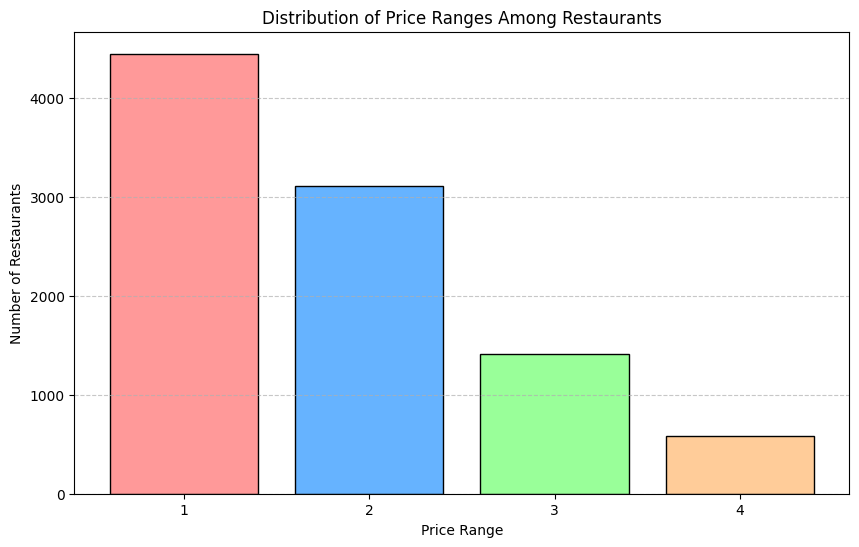

Percentage of restaurants in each price range category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [ ]:
price_range_counts = df['Price range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(price_range_counts.index, price_range_counts.values,
        color=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'], edgecolor='black')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xticks(price_range_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
total_restaurants = df.shape[0]
price_range_percentages = (price_range_counts / total_restaurants) * 100
print("Percentage of restaurants in each price range category:")
print(price_range_percentages)

Percentage of restaurants with and without online delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

Average ratings of restaurants with and without online delivery:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


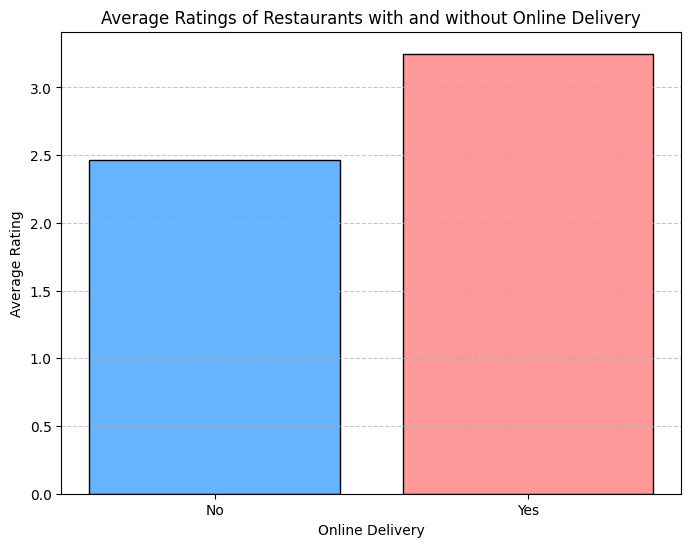

In [ ]:
online_delivery_counts = df['Has Online delivery'].value_counts()
total_restaurants = df.shape[0]
online_delivery_percentage = (online_delivery_counts / total_restaurants) * 100
print("Percentage of restaurants with and without online delivery:")
print(online_delivery_percentage)
average_rating_online = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("\nAverage ratings of restaurants with and without online delivery:")
print(average_rating_online)
plt.figure(figsize=(8, 6))
plt.bar(average_rating_online.index, average_rating_online.values, color=['#66B3FF', '#FF9999'], edgecolor='black')
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Restaurants with and without Online Delivery')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **Restaurant Ratings**

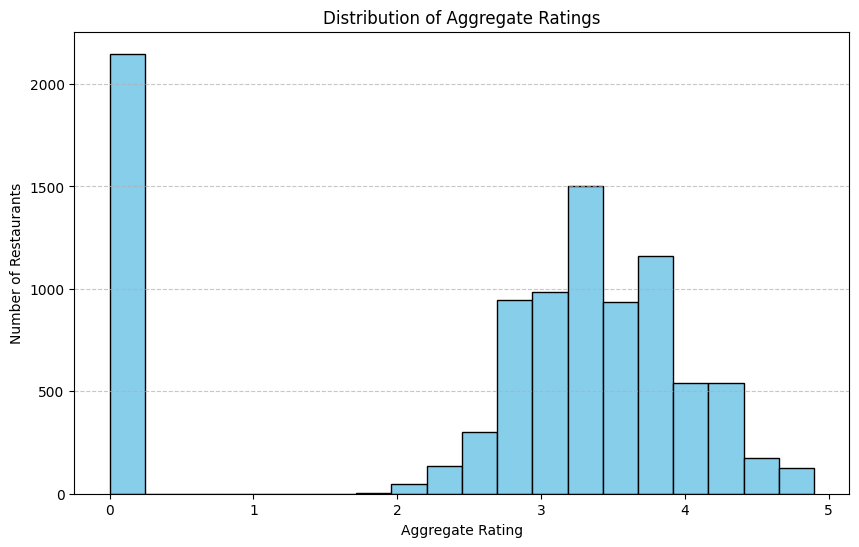

The most common rating range is: (3.0, 4.0]
The average number of votes received by restaurants is: 156.91


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
plt.figure(figsize=(10, 6))
df['Aggregate rating'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
rating_bins = [0, 1, 2, 3, 4, 5]
df['Rating Range'] = pd.cut(df['Aggregate rating'], bins=rating_bins, include_lowest=True)
most_common_rating_range = df['Rating Range'].value_counts().idxmax()
print(f"The most common rating range is: {most_common_rating_range}")
average_votes = df['Votes'].mean()
print(f"The average number of votes received by restaurants is: {average_votes:.2f}")


##  **Cuisine Combination**

In [ ]:
from itertools import combinations

In [ ]:
print(df.head())
print(df.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
# Example of loading data with appropriate parameters
df = pd.read_csv('/content/Dataset  (1).csv', encoding='utf-8', na_values=['', 'NA', 'NaN'])


In [ ]:
# Check the unique values in the 'Cuisines' column
print(df['Cuisines'].unique())

# Clean the column if necessary
df['Cuisines'] = df['Cuisines'].astype(str).apply(lambda x: x.strip() if isinstance(x, str) else x)


['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


In [ ]:
# Convert the 'Cuisines' column to lists
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else x)


In [ ]:
# Function to generate all combinations of cuisines
def get_combinations(cuisines_list):
    if cuisines_list is not None and len(cuisines_list) > 1:
        return list(combinations(cuisines_list, 2))
    else:
        return []

# Apply the function to the 'Cuisines' column
df['Cuisine Combinations'] = df['Cuisines'].apply(get_combinations)


In [ ]:
# Explode the combinations into separate rows
combinations_df = df.explode('Cuisine Combinations')

# Drop rows where 'Cuisine Combinations' is empty
combinations_df = combinations_df[combinations_df['Cuisine Combinations'].notna()]


In [ ]:
# Group by the 'Cuisine Combinations' and count
combinations_count = combinations_df.groupby('Cuisine Combinations').size().reset_index(name='Frequency')

# Sort by frequency in descending order
combinations_count = combinations_count.sort_values(by='Frequency', ascending=False)


In [ ]:
# Calculate the average rating for each combination
rating_by_combination = combinations_df.groupby('Cuisine Combinations')['Aggregate rating'].mean().reset_index(name='Average Rating')

# Merge the frequency and rating dataframes
combination_analysis = pd.merge(combinations_count, rating_by_combination, on='Cuisine Combinations')

# Sort by average rating in descending order
combination_analysis = combination_analysis.sort_values(by='Average Rating', ascending=False)


In [ ]:
# Print the most common cuisine combinations
print("Most Common Cuisine Combinations:")
print(combination_analysis.head(10))

# Print the cuisine combinations with the highest average ratings
print("\nCuisine Combinations with the Highest Average Ratings:")
print(combination_analysis.sort_values(by='Average Rating', ascending=False).head(10))


Most Common Cuisine Combinations:
               Cuisine Combinations  Frequency  Average Rating
1293               (BBQ, Breakfast)          1            4.90
884                 (Sandwich, Tea)          1            4.90
849         (Mexican, Healthy Food)          1            4.90
1481             (European, Indian)          1            4.90
533             (Sunda, Indonesian)          3            4.90
1233          (American, Caribbean)          1            4.90
1234     (American, Coffee and Tea)          1            4.90
718             (Filipino, Mexican)          2            4.85
722              (European, German)          2            4.80
1146  (Continental, Middle Eastern)          1            4.80

Cuisine Combinations with the Highest Average Ratings:
            Cuisine Combinations  Frequency  Average Rating
1293            (BBQ, Breakfast)          1            4.90
849      (Mexican, Healthy Food)          1            4.90
1481          (European, Indian)     

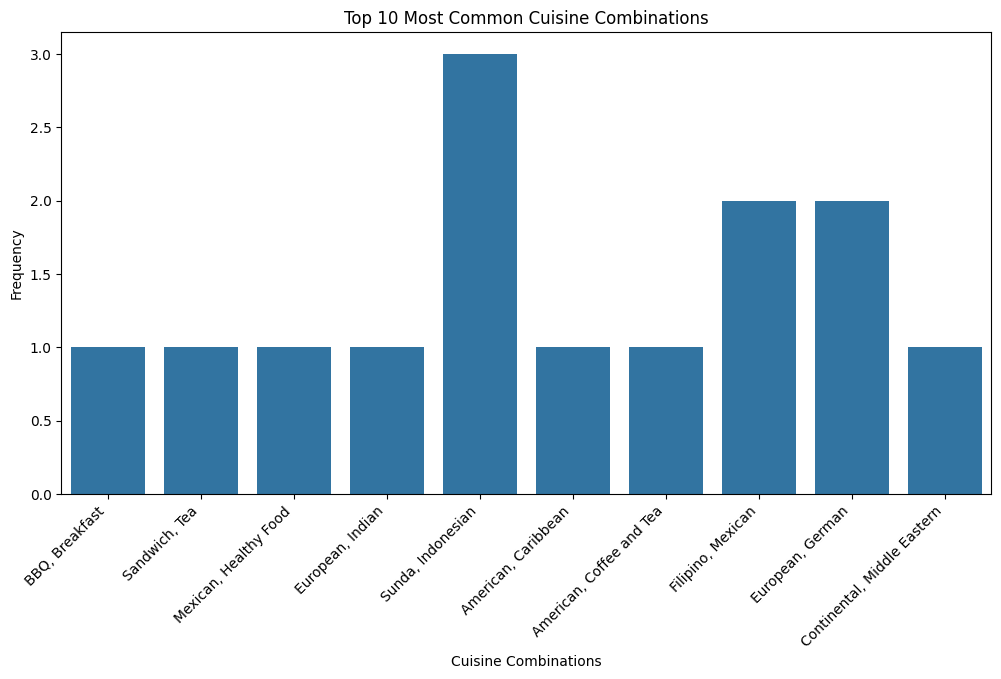

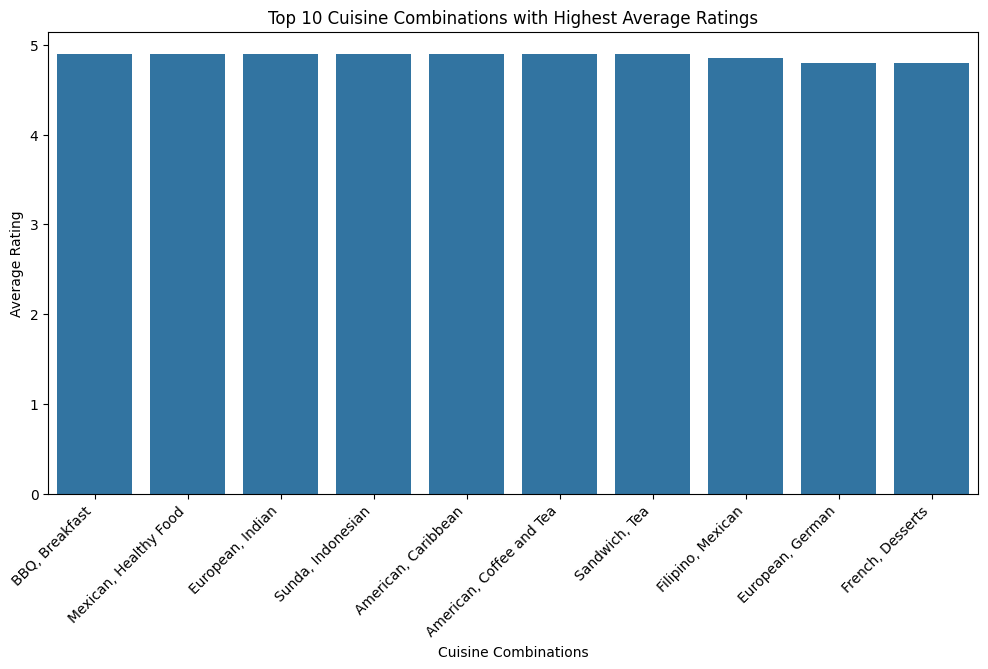

In [ ]:
# Convert the tuple combinations to string format
combination_analysis['Cuisine Combinations'] = combination_analysis['Cuisine Combinations'].apply(lambda x: ', '.join(x) if isinstance(x, tuple) else x)

# Plot the top 10 most common cuisine combinations
plt.figure(figsize=(12, 6))
sns.barplot(data=combination_analysis.head(10), x='Cuisine Combinations', y='Frequency')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Most Common Cuisine Combinations')
plt.show()

# Plot the top 10 cuisine combinations with the highest average ratings
plt.figure(figsize=(12, 6))
sns.barplot(data=combination_analysis.sort_values(by='Average Rating', ascending=False).head(10), x='Cuisine Combinations', y='Average Rating')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cuisine Combinations with Highest Average Ratings')
plt.show()


# **Geographic Analysis**

In [ ]:
import folium

In [ ]:
restaurant_map.save("restaurant_map.html")


In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data=["Cuisines", "Aggregate rating"],
    color_discrete_sequence=["fuchsia"],
    zoom=10,
    height=600
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
coords = df[['Latitude', 'Longitude']].values
db = DBSCAN(eps=0.01, min_samples=5, metric='euclidean').fit(coords)
df['Cluster'] = db.labels_
print(df['Cluster'].head())


0   -1
1   -1
2    0
3    0
4    0
Name: Cluster, dtype: int64


In [ ]:
import plotly.express as px
fig = px.scatter(
    df,
    x="Longitude",
    y="Latitude",
    color="Cluster",
    hover_name="City",
    hover_data={"Latitude": False, "Longitude": False},
    title="Top Clustered Restaurant Regions"
)
for index, row in cluster_analysis.head(10).iterrows():
    fig.add_annotation(
        x=row['Longitude'] + 0.01,
        y=row['Latitude'] + 0.01,
        text=f"{row['City']} ({row['Count']} Restaurants)",
        showarrow=True,
        arrowhead=2
    )

fig.update_layout(
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    legend_title="Cluster"
)

fig.show()


In [ ]:
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
cluster_info = pd.merge(cluster_centers, df[['Cluster', 'City', 'Locality']].drop_duplicates(), on='Cluster', how='left')
cluster_analysis = pd.merge(cluster_info, cluster_counts, on='Cluster')
top_clusters = cluster_analysis.head(10)['Cluster']


In [ ]:
top_restaurants = df[df['Cluster'].isin(top_clusters)]
top_restaurant_names = top_restaurants[['Restaurant Name', 'Cluster']].drop_duplicates()
top_restaurant_names = top_restaurant_names.sort_values(by='Cluster')
print(top_restaurant_names.head(10))


                                        Restaurant Name  Cluster
0                                      Le Petit Souffle       -1
2344                                       Chokhi Dhani       -1
2320                                              Oye24       -1
2319                          JAL - A Jungle Restaurant       -1
2318                                               KYRO       -1
2306  Jonathan's Kitchen - Holiday Inn Express & Suites       -1
2302                                            Chili's       -1
2300                                            Exotica       -1
2288                                          BrewBakes       -1
2179    The Living Room - The Westin Sohna Resort & Spa       -1


In [ ]:
city_locality_counts = df.groupby(['City', 'Locality', 'Cluster']).size().reset_index(name='Count')
city_locality_totals = city_locality_counts.groupby(['City', 'Locality'])['Count'].sum().reset_index()
top_localities = city_locality_totals.sort_values(by='Count', ascending=False).head(10)
print(top_localities)


          City             Locality  Count
712  New Delhi      Connaught Place    122
860  New Delhi       Rajouri Garden     99
873  New Delhi             Shahdara     87
725  New Delhi       Defence Colony     86
846  New Delhi            Pitampura     85
812  New Delhi  Mayur Vihar Phase 1     84
807  New Delhi        Malviya Nagar     84
859  New Delhi       Rajinder Nagar     81
864  New Delhi           Safdarjung     80
870  New Delhi         Satyaniketan     79


In [ ]:
clustered_area_names = df[df[['City', 'Locality']].apply(tuple, axis=1).isin(top_localities[['City', 'Locality']].apply(tuple, axis=1))]
for city, locality in top_localities[['City', 'Locality']].values:
    print(f"Restaurants in {city}, {locality}:")
    names = clustered_area_names[(clustered_area_names['City'] == city) & (clustered_area_names['Locality'] == locality)]['Restaurant Name'].tolist()
    print(", ".join(names[:10]))
    print()


Restaurants in New Delhi, Connaught Place:
Amber, Attitude Kitchen & Bar, Cafe Coffee Day, Castle 9, Costa Coffee, Delhi Darbar Dhaba, Garam Dharam, Gola Sizzlers, Indian Coffee House, My Bar Lounge & Restaurant

Restaurants in New Delhi, Rajouri Garden:
Bablu Chic-Inn, Babu Jhatka, Bal Gopal, Bharat Sweets, Cafe Blue Tomato, Cafe TAB, Cake-O-Licious, Chaap Point, Chawla Family Restaurant, Chawla Family Restaurant

Restaurants in New Delhi, Shahdara:
Aapka Bhojanalaya, Aayana Foods, Aggarwal Sweet India, Amchur, Anand Ji de Choley Bhatoore, Annapoorna, Big Bite, Ceaser Fast Food Centre, Chanana Ice Cream Parlour, Chaska

Restaurants in New Delhi, Defence Colony:
Aka Saka, Anil Mishtan Wala, Barista, Cafe 1 Fast Food, Cake Central - Premier Cake Design Studio, Chawla's Tandoori Junction, Chawnsan Chef, Choco Kraft, Colonel's Kababz, Confectionately Seerat's

Restaurants in New Delhi, Pitampura:
361 Restaurant & Banquet, 6 Pack Momos, Amritsari Kulcha, Bake Houz, Ben's Foods, Bobby Punja

# **Restaurant Chains**

In [ ]:
chain_counts = df['Restaurant Name'].value_counts()
chain_names = chain_counts[chain_counts > 1].index
print(f"Possible Restaurant Chains: {chain_names}")


Possible Restaurant Chains: Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation',
       ...
       'Raasta', 'The Pint Room', 'Snacks Point', 'The Dosa King', 'Chokola',
       'Town Hall', 'Halki Aanch', 'Snack Junction', 'Delhi Biryani Hut',
       'Beliram Degchiwala'],
      dtype='object', name='Restaurant Name', length=734)


In [ ]:
chain_data = df[df['Restaurant Name'].isin(chain_names)]
chain_analysis = chain_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index()
chain_analysis = chain_analysis.sort_values(by=['Aggregate rating', 'Votes'], ascending=False)
print(chain_analysis)


               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
..                         ...               ...    ...
440           Murliwala Bakers             0.000      0
538        Rajdhani Restaurant             0.000      0
616                Street Cafe             0.000      0
645              The Big Scoop             0.000      0
713               Whatslife.in             0.000      0

[734 rows x 3 columns]


In [ ]:
chain_counts = df['Restaurant Name'].value_counts()
chain_names = chain_counts[chain_counts > 1].index
print(f"Possible Restaurant Chains: {chain_names}")

Possible Restaurant Chains: Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Pizza Hut', 'Giani', 'Baskin Robbins',
       'Barbeque Nation',
       ...
       'Raasta', 'The Pint Room', 'Snacks Point', 'The Dosa King', 'Chokola',
       'Town Hall', 'Halki Aanch', 'Snack Junction', 'Delhi Biryani Hut',
       'Beliram Degchiwala'],
      dtype='object', name='Restaurant Name', length=734)


In [ ]:
chain_data = df[df['Restaurant Name'].isin(chain_names)]
chain_analysis = chain_data.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum'
}).reset_index()
chain_analysis = chain_analysis.sort_values(by=['Aggregate rating', 'Votes'], ascending=False)
print(chain_analysis)

               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
..                         ...               ...    ...
440           Murliwala Bakers             0.000      0
538        Rajdhani Restaurant             0.000      0
616                Street Cafe             0.000      0
645              The Big Scoop             0.000      0
713               Whatslife.in             0.000      0

[734 rows x 3 columns]


In [ ]:
print(chain_analysis)

               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
8      AB's Absolute Barbecues             4.850   3151
589           Silantro Fil-Mex             4.850   1364
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
..                         ...               ...    ...
440           Murliwala Bakers             0.000      0
538        Rajdhani Restaurant             0.000      0
616                Street Cafe             0.000      0
645              The Big Scoop             0.000      0
713               Whatslife.in             0.000      0

[734 rows x 3 columns]


In [ ]:
top_rated_chains = chain_analysis.sort_values(by='Aggregate rating', ascending=False).head(10)
print("Top 10 Chains by Average Rating:")
print(top_rated_chains)
most_popular_chains = chain_analysis.sort_values(by='Votes', ascending=False).head(10)
print("\nTop 10 Chains by Total Votes:")
print(most_popular_chains)

Top 10 Chains by Average Rating:
               Restaurant Name  Aggregate rating  Votes
629           Talaga Sampireun             4.900   5514
589           Silantro Fil-Mex             4.850   1364
8      AB's Absolute Barbecues             4.850   3151
7    AB's - Absolute Barbecues             4.825  13400
449         Naturals Ice Cream             4.800   3094
293                   Gymkhana             4.700    328
653     The Cheesecake Factory             4.650   3010
218                    Dishoom             4.600   1269
267          Garota de Ipanema             4.600     59
163                    Chili's             4.580   8156

Top 10 Chains by Total Votes:
               Restaurant Name  Aggregate rating  Votes
62             Barbeque Nation          4.353846  28142
7    AB's - Absolute Barbecues          4.825000  13400
79                   Big Chill          4.475000  10853
239                 Farzi Cafe          4.366667  10098
692                   Truffles          

In [ ]:
correlation = chain_analysis[['Aggregate rating', 'Votes']].corr().iloc[0, 1]
print(f"Correlation between Average Rating and Total Votes: {correlation:.2f}")

Correlation between Average Rating and Total Votes: 0.33


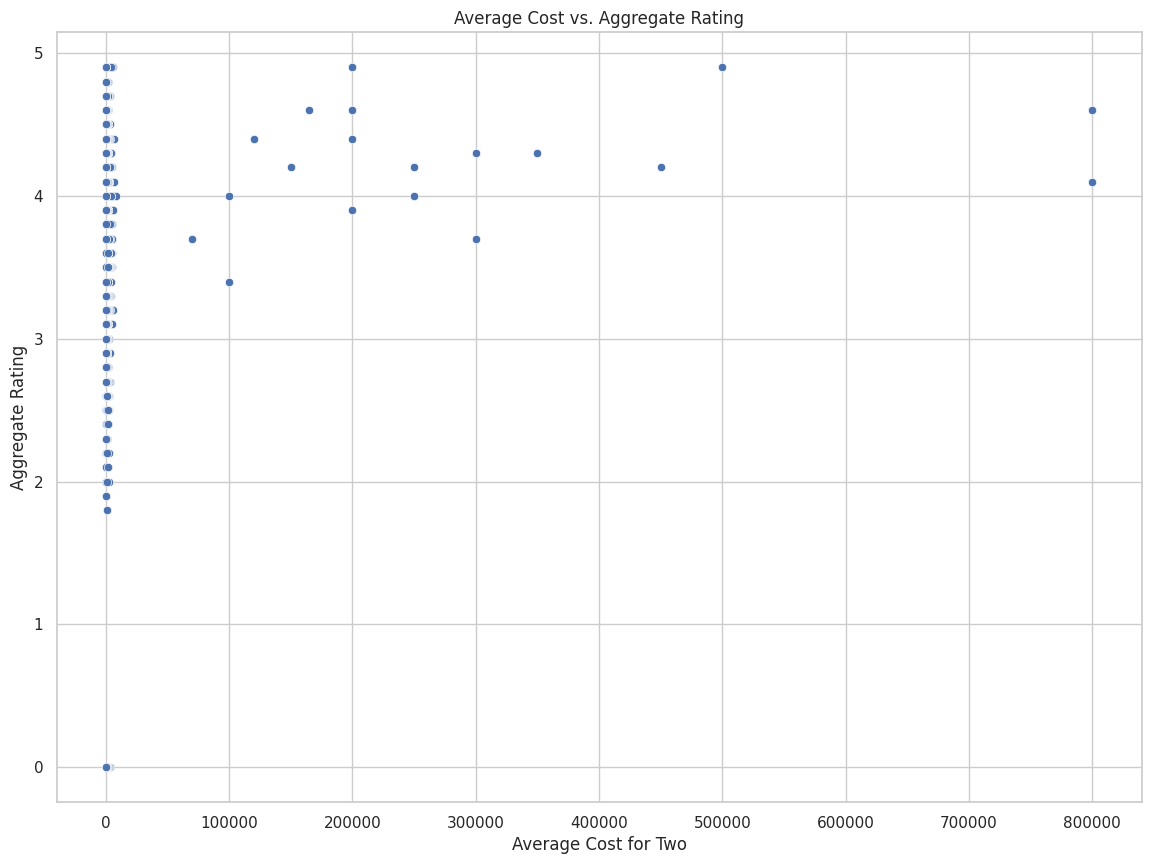

Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


In [ ]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='Average Cost for two', y='Aggregate rating')
plt.title('Average Cost vs. Aggregate Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()
price_range_rating = df.groupby('Price range')['Aggregate rating'].mean()
print(price_range_rating)
table_booking_rating = df.groupby('Has Table booking')['Aggregate rating'].mean()
online_delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print(table_booking_rating)
print(online_delivery_rating)

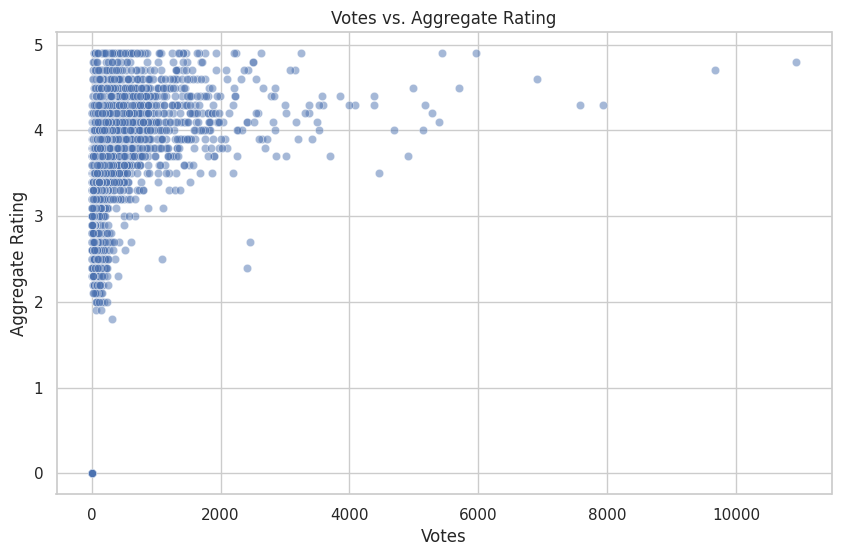

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.5)
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

# **Restaurant Reviews**

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisine Combinations', 'Cluster'],
      dtype='object')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens
df['tokens'] = df['Rating text'].astype(str).apply(preprocess_text)

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity
df['Sentiment'] = df['Rating text'].astype(str).apply(get_sentiment)
positive_reviews = df[df['Sentiment'] > 0]['Rating text']
negative_reviews = df[df['Sentiment'] < 0]['Rating text']


In [ ]:
positive_tokens = [token for sublist in positive_reviews.apply(preprocess_text) for token in sublist]
positive_counts = Counter(positive_tokens)
positive_df = pd.DataFrame(positive_counts.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)
negative_tokens = [token for sublist in negative_reviews.apply(preprocess_text) for token in sublist]
negative_counts = Counter(negative_tokens)
negative_df = pd.DataFrame(negative_counts.items(), columns=['Keyword', 'Frequency']).sort_values(by='Frequency', ascending=False)
print("Top 10 Positive Keywords:")
print(positive_df.head(10))
print("\nTop 10 Negative Keywords:")
print(negative_df.head(10))

Top 10 Positive Keywords:
     Keyword  Frequency
1       good       3179
0  excellent        301

Top 10 Negative Keywords:
   Keyword  Frequency
0  average       3737
1     poor        186


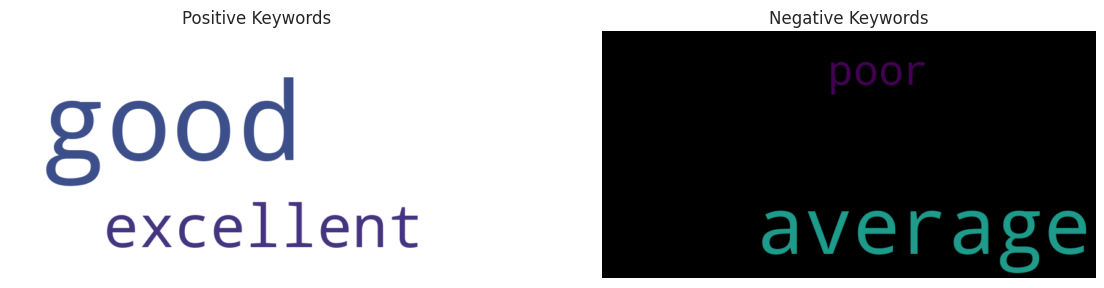

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(positive_counts))

negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(dict(negative_counts))
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Keywords')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Keywords')

plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
reviews = df['Rating text'].dropna().str.lower()
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens
df['Cleaned_Review'] = reviews.apply(preprocess_text)


positive_words = set(['good', 'excellent', 'great', 'amazing', 'fantastic', 'delicious'])
negative_words = set(['bad', 'terrible', 'poor', 'awful', 'disappointing'])

df['Positive_Words'] = df['Cleaned_Review'].apply(lambda tokens: [word for word in tokens if word in positive_words])
df['Negative_Words'] = df['Cleaned_Review'].apply(lambda tokens: [word for word in tokens if word in negative_words])


all_positive_words = [word for words_list in df['Positive_Words'] for word in words_list]
all_negative_words = [word for words_list in df['Negative_Words'] for word in words_list]

positive_word_counts = Counter(all_positive_words)
negative_word_counts = Counter(all_negative_words)
print("Most common positive words:")
print(positive_word_counts.most_common(15))

print("\nMost common negative words:")
print(negative_word_counts.most_common(15))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common positive words:
[('good', 3179), ('excellent', 301)]

Most common negative words:
[('poor', 186)]


Average Length of Reviews (in words): 1.34


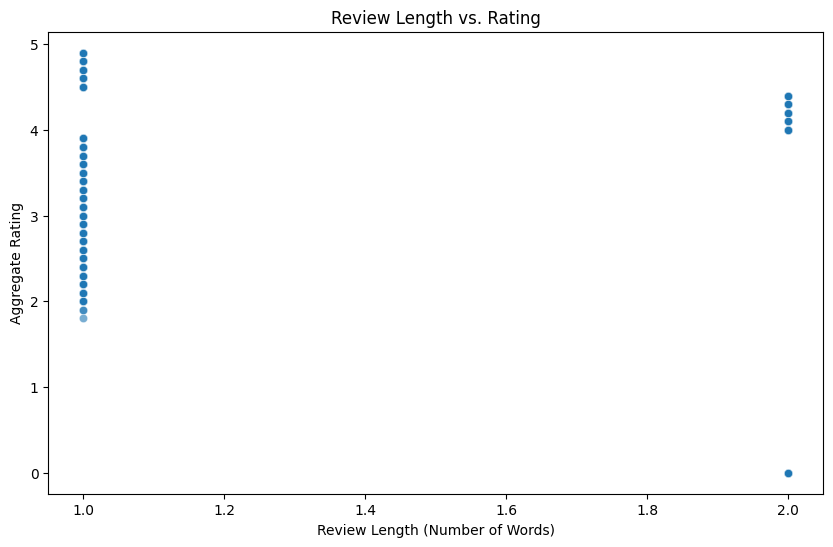

Correlation between Review Length and Rating: -0.60


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['Review_Length_Words'] = df['Rating text'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
average_length = df['Review_Length_Words'].mean()
print(f'Average Length of Reviews (in words): {average_length:.2f}')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review_Length_Words', y='Aggregate rating', data=df, alpha=0.6)
plt.title('Review Length vs. Rating')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Aggregate Rating')
plt.show()
correlation = df[['Review_Length_Words', 'Aggregate rating']].corr().iloc[0, 1]
print(f'Correlation between Review Length and Rating: {correlation:.2f}')


In [ ]:
import pandas as pd
df['Review_Length_Words'] = df['Rating text'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)
average_length = df['Review_Length_Words'].mean()
print(f'Average Length of Reviews (in words): {average_length:.2f}')


Average Length of Reviews (in words): 1.34


# **Votes Analysis**

In [ ]:
highest_votes_restaurant = df.sort_values('Votes', ascending=False).iloc[0]
print(f"Restaurant with the highest votes:\nName: {highest_votes_restaurant['Restaurant Name']}\nVotes: {highest_votes_restaurant['Votes']}")

lowest_votes_restaurant = df.sort_values('Votes', ascending=True).iloc[0]
print(f"\nRestaurant with the lowest votes:\nName: {lowest_votes_restaurant['Restaurant Name']}\nVotes: {lowest_votes_restaurant['Votes']}")


Restaurant with the highest votes:
Name: Toit
Votes: 10934

Restaurant with the lowest votes:
Name: Khalsa Eating Point
Votes: 0


In [ ]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"Correlation between Number of Votes and Rating: {correlation:.2f}")

Correlation between Number of Votes and Rating: 0.31


This suggests that there is a moderate positive relationship between the number of votes a restaurant receives and its rating. This means that, generally, restaurants with more votes tend to have higher ratings, but the relationship is not very strong.

# Price Range vs. Online Delivery and Table Booking

<ipython-input-6-e83563218eca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has Online delivery', y='Price range', data=average_price_range_delivery, palette="Set2")


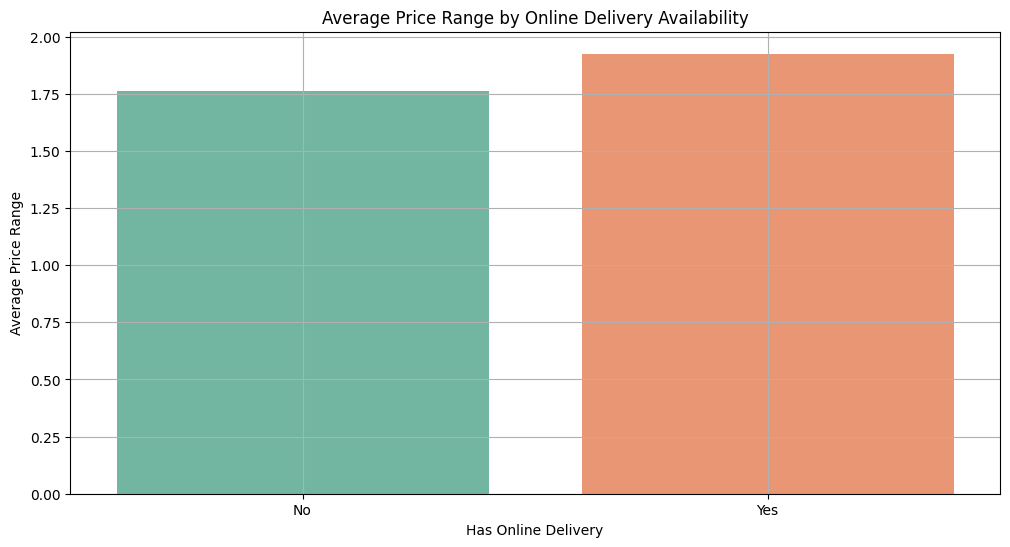

In [ ]:
average_price_range_delivery = df.groupby('Has Online delivery')['Price range'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Has Online delivery', y='Price range', data=average_price_range_delivery, palette="Set2")
plt.title('Average Price Range by Online Delivery Availability')
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Price Range')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.show()


<ipython-input-7-cc01995c757d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has Table booking', y='Price range', data=average_price_range_booking, palette="Set2")


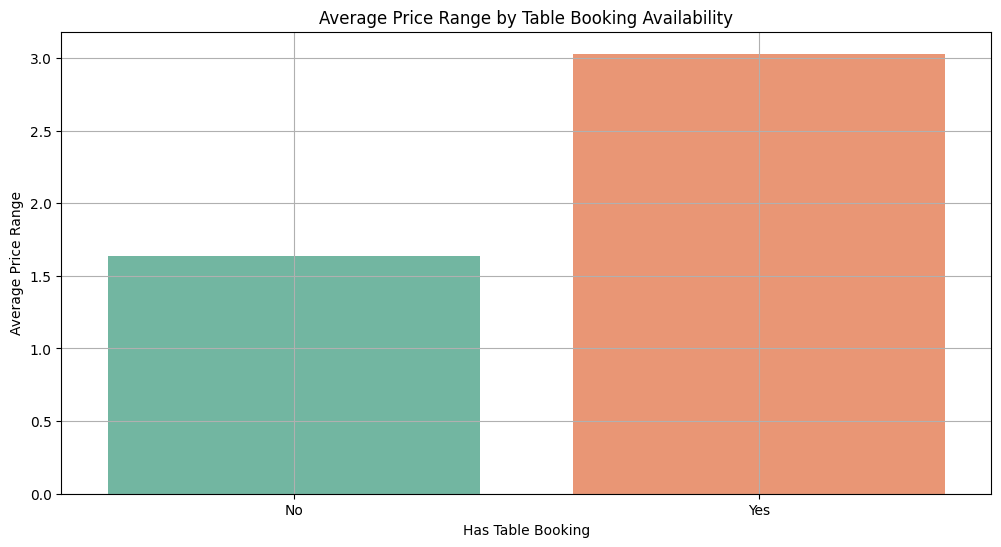

In [ ]:
average_price_range_booking = df.groupby('Has Table booking')['Price range'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Has Table booking', y='Price range', data=average_price_range_booking, palette="Set2")
plt.title('Average Price Range by Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Price Range')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(True)
plt.show()
